In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [17]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)

In [20]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [21]:
# One-hot encoding
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [22]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
# selecting relevant variables
# independent variables
# ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
x = titanic_df.iloc[:, 1:10]
# dependent variable (only 'Survived')
y = titanic_df.iloc[:, 0]

In [28]:
# splitting data to training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

# splitting training set to training set and development set
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=0
)

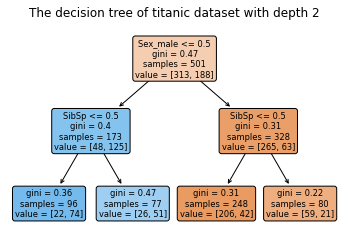

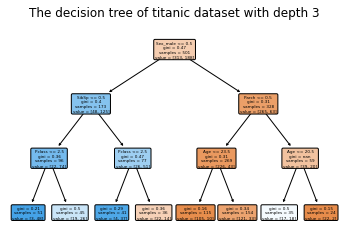

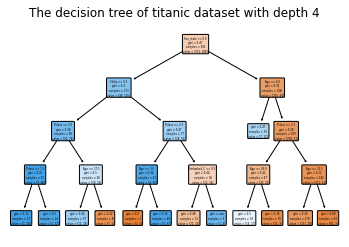

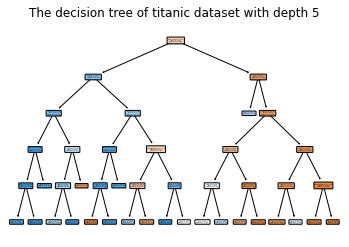

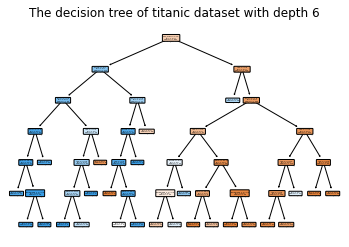

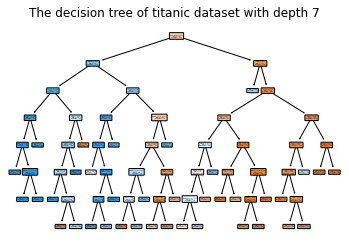

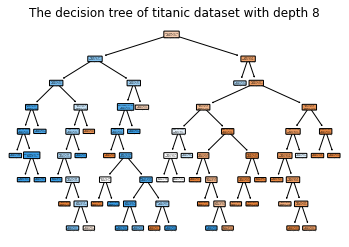

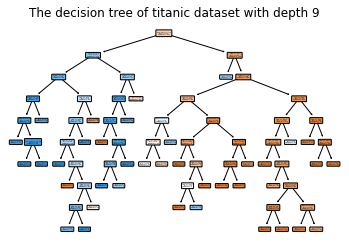

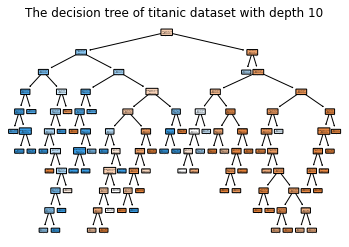

In [36]:
# fitting the training data to the decision tree
# with varying depths

# list of the depths
prune_depths = range(2, 11)

# list of training set accuracies
train_scores = []
# list of development set accuracies
dev_scores = []

# per each depth
for depth in prune_depths:

    # instanciating a new tree with the new maximum depth
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    # fitting the training set to the model
    tree_model.fit(X_train, y_train)
    # adding the training set accuracy to the list
    train_scores.append(tree_model.score(X_train, y_train))
    # adding the development set accuracy to the list
    dev_scores.append(tree_model.score(X_dev, y_dev))

    # plotting the tree
    fig = plt.figure()
    tree.plot_tree(
        tree_model,
        feature_names=X_train.columns,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    plt.title("The decision tree of titanic dataset with depth {}".format(depth))

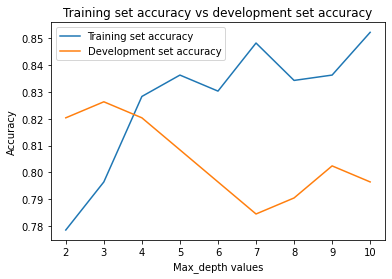

In [34]:
# plotting training set accuracy vs development set accuracy
fig, ax = plt.subplots()
ax.plot(prune_depths, train_scores)
ax.plot(prune_depths, dev_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title("Training set accuracy vs development set accuracy")
plt.legend(["Training set accuracy", "Development set accuracy"])
ax.xaxis.set_ticks(prune_depths)
plt.show()



The lines in the plot exhibit fluctuations rather than a steady trend as the depth of the tree model increases. However, the training set's accuracy generally shows an upward trend, while the development set's accuracy tends to decline. This indicates that as the tree model becomes deeper, its complexity increases, leading to improved performance on the training set but deteriorating performance on the development set.

Up to a depth of 4, the model appears to be underfitting the data. Beyond a depth of 4, the model begins to overfit, as evidenced by the growing disparity between the accuracies of the training and development sets.

Based on the plot, the optimal tree depth is 4, where the accuracies of both the training and development sets are similar, suggesting the model achieves its best performance at this point.



In [35]:
# measuring the model's performance on test set
# using the depth 4
tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)
# fitting the training set to the model
tree_model.fit(X_train, y_train)

print("Accuracy of the final model: {}".format(tree_model.score(X_test, y_test)))

Accuracy of the final model: 0.8071748878923767
